In [1]:
%matplotlib inline

In [2]:
import pandas as pd
from sklearn import datasets


iris = datasets.load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target)
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


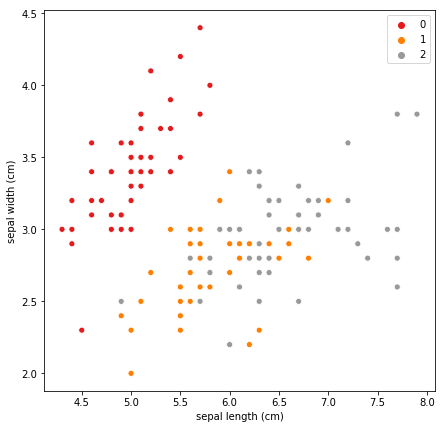

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(7, 7))
sns.scatterplot(X['sepal length (cm)'], X['sepal width (cm)'], y, palette='Set1', ax=ax)

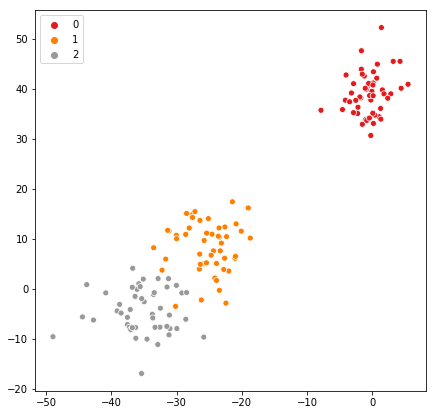

In [4]:
import metric_learn


nca = metric_learn.NCA(init='auto')
Xt = nca.fit_transform(X, y)

fig, ax = plt.subplots(figsize=(7, 7))
sns.scatterplot(Xt[:, 0], Xt[:, 1], y, palette='Set1', ax=ax)

In [47]:
import itertools
import numpy as np

# LEGO - http://people.bu.edu/bkulis/pubs/nips_online.pdf
# http://www.cs.utexas.edu/users/pjain/pubs/metriclearning_icml.pdf

X_vec = X.to_numpy()
y_vec = y.to_numpy()
p = X_vec.shape[1]
A = np.eye(p)
eta = 0.00001

for no, (i, j) in enumerate(itertools.combinations(range(len(X_vec)), 2)):
    u, v = X_vec[i], X_vec[j]
    yi, yj = y_vec[i], y_vec[j]
    yy = 100 * (1 if yi == yj else -1)
    
    z = u - v
    y_pred = z @ A @ z
    
    # Equation 2.3
    num = eta * yy * y_pred - 1 + np.sqrt((eta * yy * y_pred - 1) ** 2 + 4 * eta * y_pred ** 2)
    den = 2 * eta * y_pred
    yb = num / den 
    
    # Equation 2.2
    num = eta * (yb - yy) * A @ np.outer(z, z) @ A
    den = 1 + eta * (yb - yy) * y_pred
    A -= num / den
    
    if no == 5000:
        break
        
A

array([[ 0.50567894, -0.13175598, -0.19191021, -0.02618083],
       [-0.13175598,  0.57173347,  0.13706982, -0.01137291],
       [-0.19191021,  0.13706982,  0.22592188, -0.2834401 ],
       [-0.02618083, -0.01137291, -0.2834401 ,  0.71142952]])

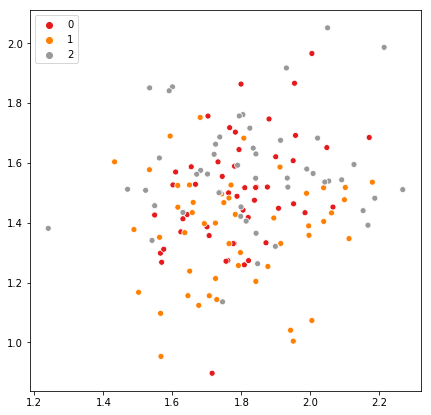

In [48]:
Xt = X_vec @ A

fig, ax = plt.subplots(figsize=(7, 7))
sns.scatterplot(Xt[:, 0], Xt[:, 1], y, palette='Set1', ax=ax)

In [14]:
z

array([0.2, 0.5, 0. , 0. ])

In [15]:
0.7 ** 0.5

0.8366600265340756

In [44]:
yb

nan